<a href="https://colab.research.google.com/github/dhyannn/predictive-analytics/blob/main/514_PAlab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet prophet


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
data = pd.read_csv("/content/Time-Series Analysis Dataset.csv")

In [ ]:
data.head(5)

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,26.0,1.0,22.01,101.0,3.08,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,25.0,1.0,22.06,105.0,2.94,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,2.82,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,2.39,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night


In [ ]:
data.shape

(648, 12)

In [ ]:
data.describe()

,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,27.797595,0.541082,15.871303,139.523046,2.267114,3.616974,1011.535411,1.641283,276.195792,0.009820
std,4.305725,0.498809,3.065238,118.438353,0.755191,1.608687,1.932765,2.493683,2.788063,0.036247
min,19.000000,0.000000,5.740000,0.000000,0.600000,0.840000,1005.970000,0.000000,268.600000,0.000000
25%,24.000000,0.000000,14.025000,44.000000,1.780000,2.460000,1010.235000,0.000000,274.600000,0.000000
50%,27.000000,1.000000,15.710000,105.000000,2.200000,3.220000,1011.430000,0.000000,276.100000,0.000000
75%,32.000000,1.000000,17.990000,217.500000,2.780000,4.345000,1012.675000,3.000000,277.800000,0.000000
max,36.000000,1.000000,22.350000,359.000000,4.180000,10.540000,1016.900000,8.000000,284.900000,0.420000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime_local    499 non-null    object 
 1   temperature       499 non-null    float64
 2   humidity          499 non-null    float64
 3   dew_point         499 non-null    float64
 4   wind_bearing      499 non-null    float64
 5   wind_speed        499 non-null    float64
 6   wind_gust         499 non-null    float64
 7   pressure          499 non-null    float64
 8   uv_index          499 non-null    float64
 9   ozone             499 non-null    float64
 10  precip_intensity  499 non-null    float64
 11  icon              499 non-null    object 
dtypes: float64(10), object(2)
memory usage: 60.9+ KB


In [ ]:
data.isna().sum()

,0
datetime_local,149
temperature,149
humidity,149
dew_point,149
wind_bearing,149
wind_speed,149
wind_gust,149
pressure,149
uv_index,149
ozone,149


In [ ]:
data['datetime_local'] = pd.to_datetime(data['datetime_local'], errors='coerce', dayfirst=True)

# Drop rows with invalid datetime values
data.dropna(subset=['datetime_local'], inplace=True)

# Set as index
data.set_index('datetime_local', inplace=True)


In [ ]:
data.fillna(method='ffill', inplace=True)

<ipython-input-33-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
print(data.index.isnull().sum())

0


In [ ]:
scaler = MinMaxScaler()
numerical_columns = ['temperature', 'humidity', 'dew_point', 'wind_speed', 'wind_gust', 'pressure', 'uv_index', 'ozone']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
# One-hot encode 'icon'
data = pd.get_dummies(data, columns=['icon'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

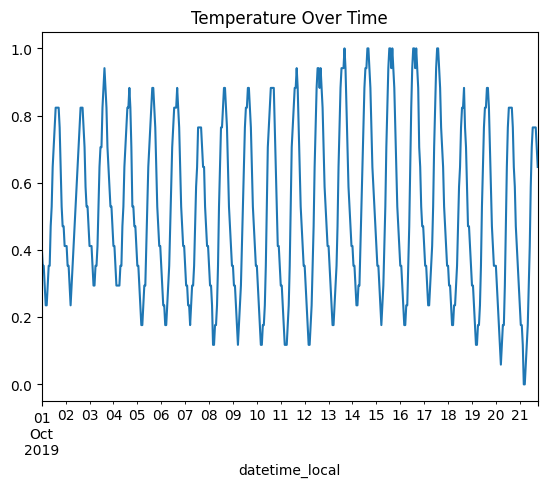

In [ ]:
# Line Plot
data['temperature'].plot(title='Temperature Over Time')
plt.show()

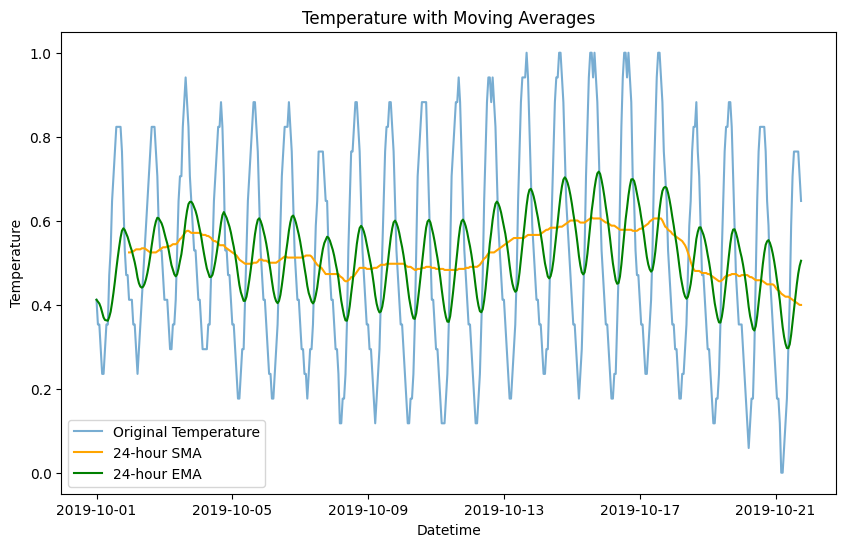

In [ ]:
# Calculate Simple Moving Average (SMA)
window_size = 24  # Example: 24-hour rolling window
data['temperature_sma'] = data['temperature'].rolling(window=window_size).mean()

# Calculate Exponential Moving Average (EMA)
data['temperature_ema'] = data['temperature'].ewm(span=window_size, adjust=False).mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data['temperature'], label='Original Temperature', alpha=0.6)
plt.plot(data['temperature_sma'], label=f'{window_size}-hour SMA', color='orange')
plt.plot(data['temperature_ema'], label=f'{window_size}-hour EMA', color='green')
plt.legend()
plt.title('Temperature with Moving Averages')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.show()


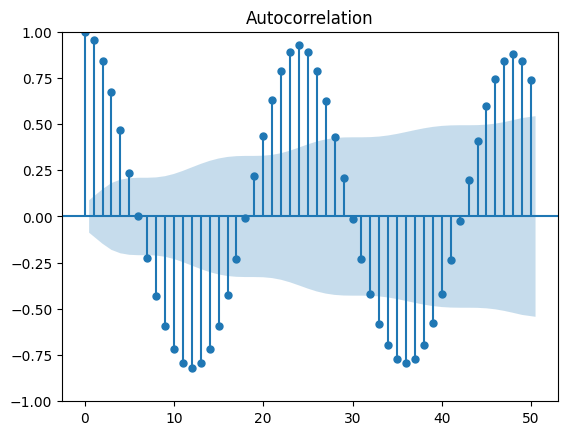

In [ ]:
# ACF and PACF
plot_acf(data['temperature'], lags=50)
plt.show()

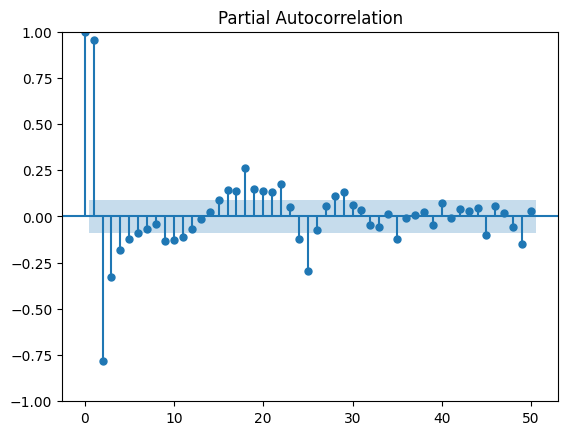

In [ ]:
plot_pacf(data['temperature'], lags=50)
plt.show()

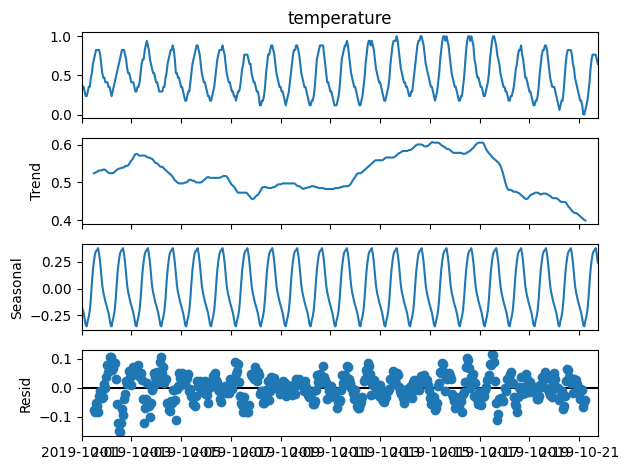

In [ ]:
# Decomposition
result = seasonal_decompose(data['temperature'], model='additive', period=24)
result.plot()
plt.show()

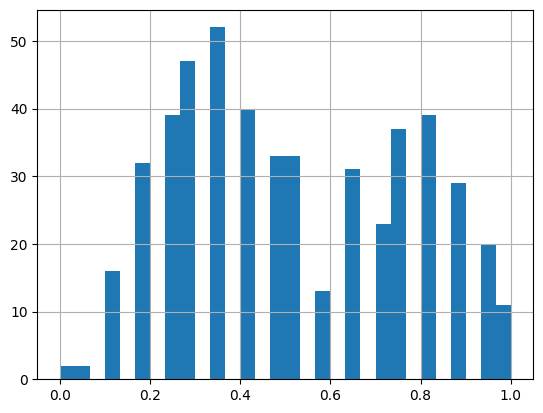

In [ ]:
# Histogram
data['temperature'].hist(bins=30)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

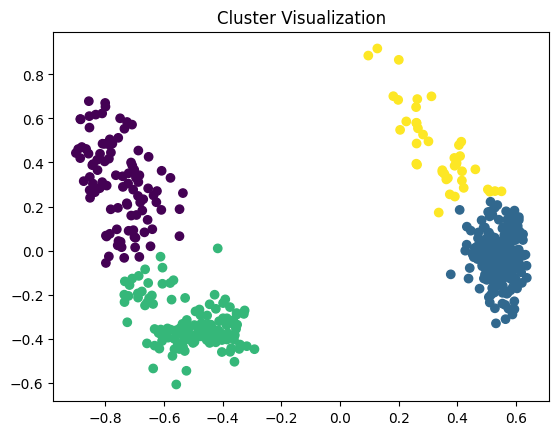

In [ ]:
# Dimensionality Reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data[numerical_columns])

# K-Means Clustering
kmeans = KMeans(n_clusters=4)
data['cluster'] = kmeans.fit_predict(reduced_data)

# Plot Clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['cluster'], cmap='viridis')
plt.title('Cluster Visualization')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define target and features
X = data.drop(columns=['icon_partly-cloudy-night', 'icon_clear-day'])  # Example of one-hot target
y = data['icon_partly-cloudy-night']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.95      0.99      0.97        87
        True       0.89      0.62      0.73        13

    accuracy                           0.94       100
   macro avg       0.92      0.80      0.85       100
weighted avg       0.94      0.94      0.94       100



In [ ]:
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import numpy as np


# Target variable for forecasting
y = data['temperature']

# Check stationarity
adf_test = adfuller(y.dropna())
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] > 0.05:
    print("Data is non-stationary. Differencing...")
    y_diff = y.diff().dropna()
else:
    print("Data is stationary.")
    y_diff = y

# Train-test split
train_size = int(0.8 * len(y_diff))
train, test = y_diff[:train_size], y_diff[train_size:]


ADF Statistic: -2.286811301209074
p-value: 0.1762568768647601
Data is non-stationary. Differencing...


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit ARIMA
arima_model = ARIMA(train, order=(1, 1, 1))
arima_result = arima_model.fit()

# Predict
arima_forecast = arima_result.forecast(steps=len(test))
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f"ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}")


ARIMA MAE: 0.06769011256194146, RMSE: 0.07941491158785714


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters
hw_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=24)
hw_result = hw_model.fit()

# Predict
hw_forecast = hw_result.forecast(len(test))
hw_mae = mean_absolute_error(test, hw_forecast)
hw_rmse = np.sqrt(mean_squared_error(test, hw_forecast))
print(f"Holt-Winters MAE: {hw_mae}, RMSE: {hw_rmse}")


Holt-Winters MAE: 0.024305724148419118, RMSE: 0.032507319524421506


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsv_g3bqo/iqiesnwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsv_g3bqo/n5qxtrfx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6512', 'data', 'file=/tmp/tmpsv_g3bqo/iqiesnwh.json', 'init=/tmp/tmpsv_g3bqo/n5qxtrfx.json', 'output', 'file=/tmp/tmpsv_g3bqo/prophet_model57qrxwbi/prophet_model-20241204171809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:18:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:18:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version,

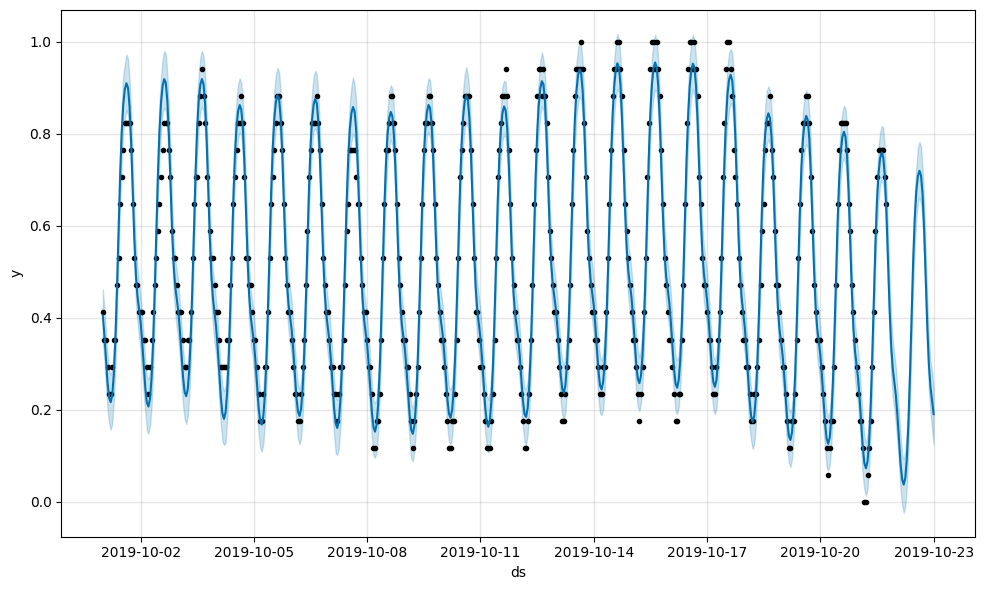

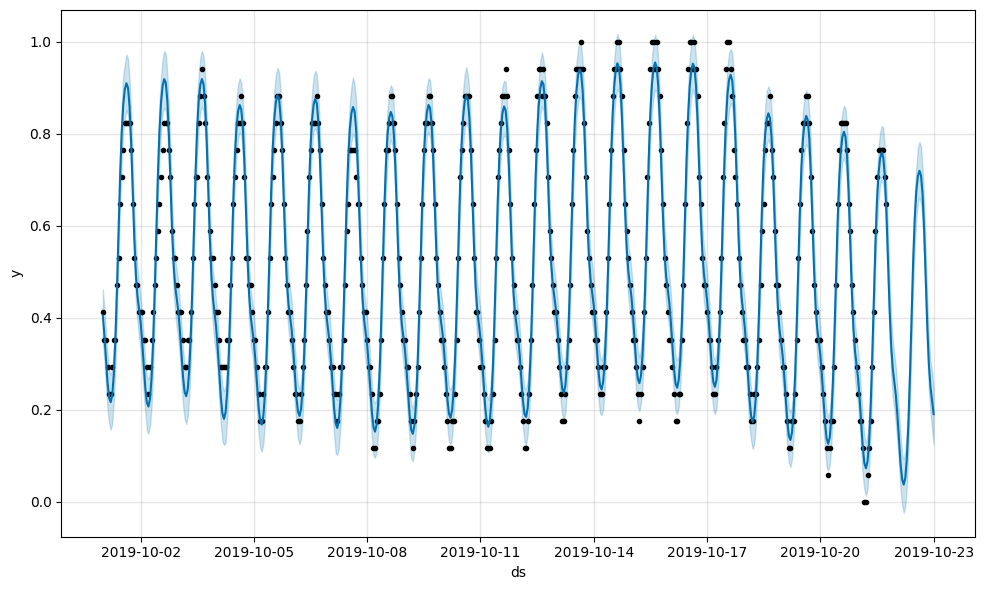

In [ ]:
from prophet import Prophet
import pandas as pd

# Prepare data for Prophet
data = data.reset_index()
data.rename(columns={'datetime_local': 'ds', 'temperature': 'y'}, inplace=True)

# Initialize and fit the model
model = Prophet()
model.fit(data)

# Create future DataFrame for predictions
future = model.make_future_dataframe(periods=30, freq='H')  # Example: 30 hours
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)


In [ ]:
# Prepare data for Prophet
prophet_data = y.reset_index()
prophet_data.columns = ['ds', 'y']

# Train Prophet model
prophet = Prophet()
prophet.fit(prophet_data.iloc[:train_size])

# Predict
future = prophet.make_future_dataframe(periods=len(test))
forecast = prophet.predict(future)
prophet_forecast = forecast['yhat'][-len(test):]
prophet_mae = mean_absolute_error(test, prophet_forecast)
prophet_rmse = np.sqrt(mean_squared_error(test, prophet_forecast))
print(f"Prophet MAE: {prophet_mae}, RMSE: {prophet_rmse}")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsv_g3bqo/_4ozkm4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsv_g3bqo/3yami0sl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22209', 'data', 'file=/tmp/tmpsv_g3bqo/_4ozkm4c.json', 'init=/tmp/tmpsv_g3bqo/3yami0sl.json', 'output', 'file=/tmp/tmpsv_g3bqo/prophet_modelj5bh1m1q/prophet_model-20241204171856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:18:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:18:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet MAE: 1.8185313083566, RMSE: 1.8852694701768111


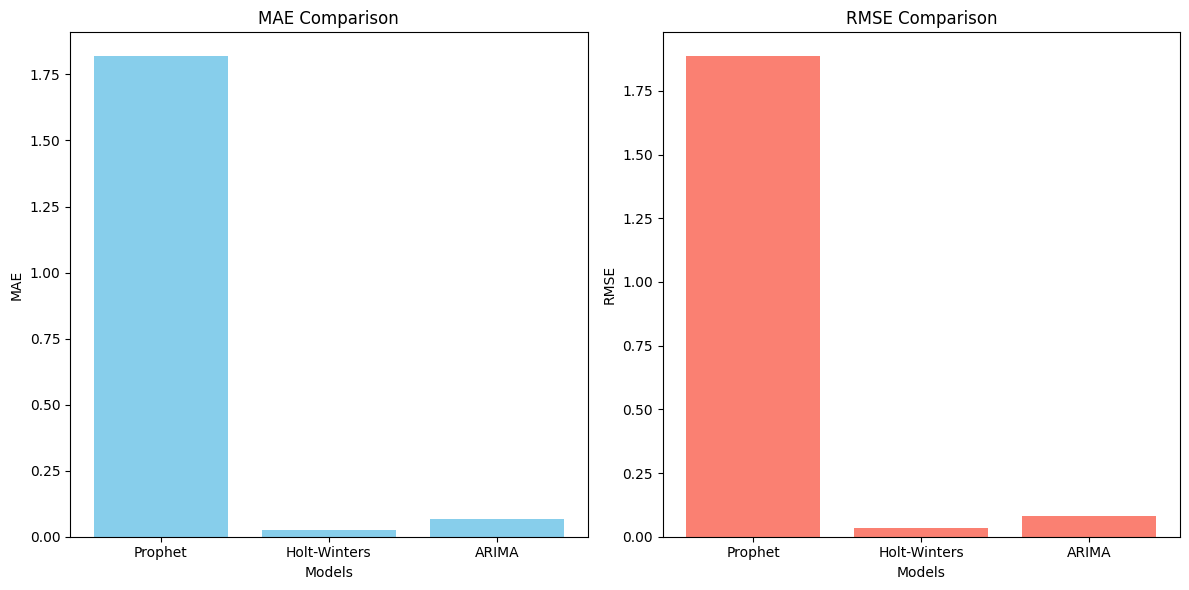

In [ ]:
import matplotlib.pyplot as plt

# Error values for each model
models = ['Prophet', 'Holt-Winters', 'ARIMA']
mae = [1.8185, 0.0243, 0.0677]  # Mean Absolute Error (MAE)
rmse = [1.8853, 0.0325, 0.0794]  # Root Mean Squared Error (RMSE)

# Plotting histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for MAE
axs[0].bar(models, mae, color='skyblue')
axs[0].set_title('MAE Comparison')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('Models')

# Histogram for RMSE
axs[1].bar(models, rmse, color='salmon')
axs[1].set_title('RMSE Comparison')
axs[1].set_ylabel('RMSE')
axs[1].set_xlabel('Models')

plt.tight_layout()
plt.show()
